#Importing Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#Data Preprocessing

#Training Image preprocessing

In [13]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Data/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


#Validation Image Preprocessing

In [14]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Data/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 359 files belonging to 36 classes.


#Building Model

In [4]:
cnn = tf.keras.models.Sequential()

#Building Convolution Layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
#cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
#cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Dropout(0.5))#To avoid overfitting

In [8]:
cnn.add(tf.keras.layers.Flatten())

In [9]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [10]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [11]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 [==============================] - 1150s 12s/step - loss: 9.2767 - accuracy: 0.0424 - val_loss: 12.8399 - val_accuracy: 0.0306
Epoch 2/30
98/98 [==============================] - 120s 1s/step - loss: 4.5076 - accuracy: 0.0571 - val_loss: 3.3920 - val_accuracy: 0.1337
Epoch 3/30
98/98 [==============================] - 119s 1s/step - loss: 3.9022 - accuracy: 0.0973 - val_loss: 3.1315 - val_accuracy: 0.2117
Epoch 4/30
98/98 [==============================] - 117s 1s/step - loss: 3.8447 - accuracy: 0.1438 - val_loss: 5.2457 - val_accuracy: 0.1253
Epoch 5/30
98/98 [==============================] - 124s 1s/step - loss: 3.4120 - accuracy: 0.2067 - val_loss: 2.4868 - val_accuracy: 0.3760
Epoch 6/30
98/98 [==============================] - 110s 1s/step - loss: 3.1617 - accuracy: 0.2677 - val_loss: 2.5062 - val_accuracy: 0.4875
Epoch 7/30
98/98 [==============================] - 118s 1s/step - loss: 2.8802 - accuracy: 0.3252 - val_loss: 2.8075 - val_accuracy: 0.3816
Epoch 8/30

#Saving Model

In [23]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
training_history.history #dictionary

{'loss': [9.276687622070312,
  4.507567882537842,
  3.9021894931793213,
  3.844696521759033,
  3.412000894546509,
  3.161696434020996,
  2.880221366882324,
  2.6793649196624756,
  2.3870701789855957,
  2.6986987590789795,
  2.536566972732544,
  1.7896803617477417,
  1.7221193313598633,
  1.7283594608306885,
  1.7008373737335205,
  1.6601974964141846,
  1.4180731773376465,
  1.6482893228530884,
  1.396722674369812,
  1.364030361175537,
  1.2241336107254028,
  1.2301936149597168,
  1.0740588903427124,
  1.1366312503814697,
  1.1075493097305298,
  1.0713409185409546,
  0.8999506831169128,
  1.0029464960098267,
  0.866042971611023,
  0.8942648768424988],
 'accuracy': [0.0423756018280983,
  0.05714285746216774,
  0.09727127104997635,
  0.14382022619247437,
  0.2067415714263916,
  0.2677367627620697,
  0.3252006471157074,
  0.3746388554573059,
  0.44109150767326355,
  0.4658105969429016,
  0.5261636972427368,
  0.5579454302787781,
  0.589085042476654,
  0.6141251921653748,
  0.64141249656677

In [25]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [26]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#Calculating Accuracy of Model Achieved on Validation set


In [32]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-2]*100))

Validation set Accuracy: 91.92200303077698 %


#Accuracy Visualization

#Training Visualization

In [28]:
#training_history.history['accuracy']

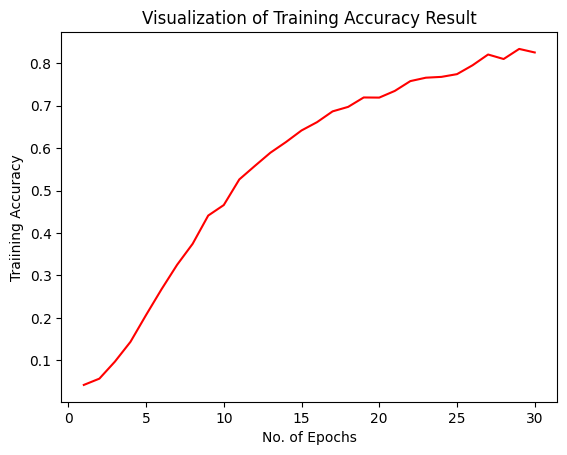

In [34]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

#Validation Accuracy

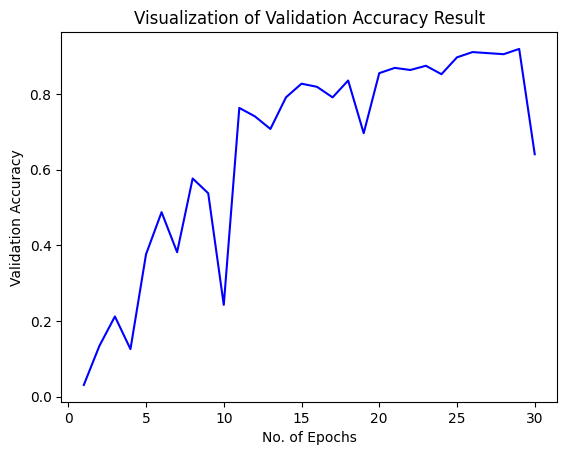

In [30]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

#Test set Evaluation

In [31]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Data/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 359 files belonging to 36 classes.


In [35]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 108s 2s/step - loss: 4.7413 - accuracy: 0.6435
Test accuracy: 0.6434540152549744
